In [1]:
!pip install mujoco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 847.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 13.1 MB/s eta 0:00:00


Path found: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Execution time: 0.00049591064453125 seconds


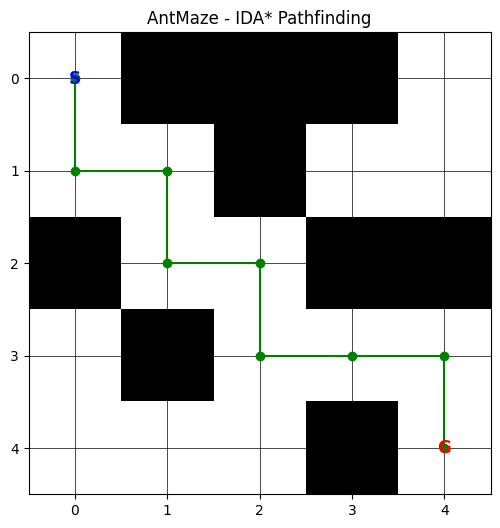

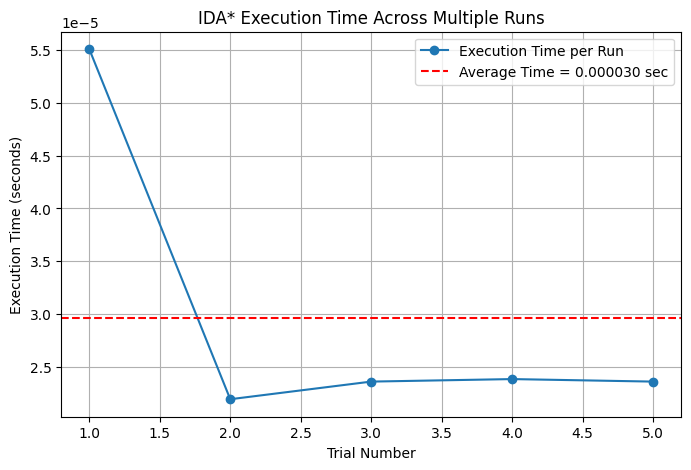

Average execution time over 5 runs: 0.000030 seconds


In [7]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# Example 5x5 custom AntMaze (1 = wall, 0 = free path)
maze = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)  # Start position
goal = (4, 4)   # Goal position

class Node:
    def __init__(self, position, cost, parent=None):
        self.position = position
        self.cost = cost
        self.parent = parent

    def __lt__(self, other):
        return self.cost < other.cost

def heuristic(a, b):
    """Manhattan distance heuristic"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def ida_star(start, goal, maze):
    """Performs IDA* search on the maze"""

    def search(node, g, bound):
        """Recursive search function"""
        f = g + heuristic(node.position, goal)
        if f > bound:
            return f
        if node.position == goal:
            return node
        min_cost = math.inf
        for move in [(0,1), (1,0), (0,-1), (-1,0)]:
            new_pos = (node.position[0] + move[0], node.position[1] + move[1])
            if 0 <= new_pos[0] < maze.shape[0] and 0 <= new_pos[1] < maze.shape[1] and maze[new_pos] == 0:
                child = Node(new_pos, g + 1, node)
                result = search(child, g + 1, bound)
                if isinstance(result, Node):
                    return result
                if result < min_cost:
                    min_cost = result
        return min_cost

    start_node = Node(start, 0)
    bound = heuristic(start, goal)

    while True:
        result = search(start_node, 0, bound)
        if isinstance(result, Node):
            # Reconstruct path
            path = []
            while result:
                path.append(result.position)
                result = result.parent
            return path[::-1]
        if result == math.inf:
            return None
        bound = result

# Measure execution time
start_time = time.time()
path = ida_star(start, goal, maze)
end_time = time.time()
execution_time = end_time - start_time

print("Path found:", path)
print("Execution time:", execution_time, "seconds")

# Visualizing the maze and path
def plot_maze(maze, path, start, goal):
    plt.figure(figsize=(6,6))
    plt.imshow(maze, cmap="gray_r")

    # Mark start and goal
    plt.text(start[1], start[0], "S", ha="center", va="center", color="blue", fontsize=12, fontweight="bold")
    plt.text(goal[1], goal[0], "G", ha="center", va="center", color="red", fontsize=12, fontweight="bold")

    # Plot path
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker="o", color="green", markersize=6, linestyle="-")

    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(True, color="black", linewidth=0.5)
    plt.title("AntMaze - IDA* Pathfinding")
    plt.show()

plot_maze(maze, path, start, goal)

# Running multiple experiments
num_trials = 5  # Number of times to run the algorithm
execution_times = []

for i in range(num_trials):
    start_time = time.time()
    _ = ida_star(start, goal, maze)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculate average execution time
avg_time = np.mean(execution_times)

# Plot execution times
plt.figure(figsize=(8,5))
plt.plot(range(1, num_trials+1), execution_times, marker="o", linestyle="-", label="Execution Time per Run")
plt.axhline(avg_time, color="r", linestyle="--", label=f"Average Time = {avg_time:.6f} sec")

plt.xlabel("Trial Number")
plt.ylabel("Execution Time (seconds)")
plt.title("IDA* Execution Time Across Multiple Runs")
plt.legend()
plt.grid()
plt.show()

print(f"Average execution time over {num_trials} runs: {avg_time:.6f} seconds")



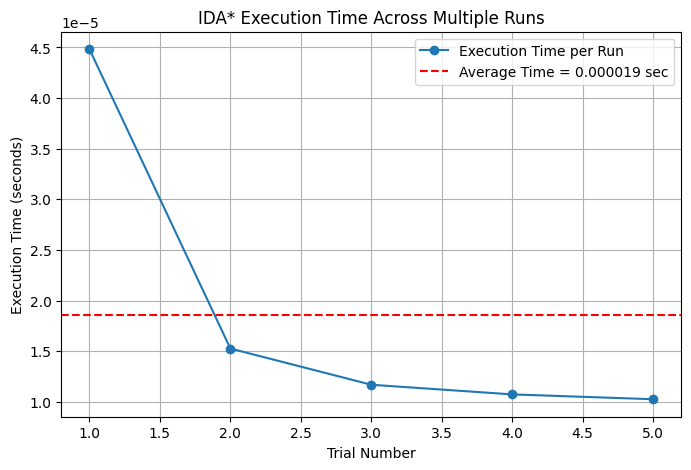

Average execution time over 5 runs: 0.000019 seconds


In [6]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# Custom 5x5 AntMaze (1 = wall, 0 = free path)
maze = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)  # Start position
goal = (4, 4)   # Goal position

class Node:
    def __init__(self, position, cost, parent=None):
        self.position = position
        self.cost = cost
        self.parent = parent

    def __lt__(self, other):
        return self.cost < other.cost

def heuristic(a, b):
    """Manhattan distance heuristic"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def ida_star(start, goal, maze):
    """Performs IDA* search on the maze"""

    def search(node, g, bound):
        """Recursive search function"""
        f = g + heuristic(node.position, goal)
        if f > bound:
            return f
        if node.position == goal:
            return node
        min_cost = math.inf
        for move in [(0,1), (1,0), (0,-1), (-1,0)]:
            new_pos = (node.position[0] + move[0], node.position[1] + move[1])
            if 0 <= new_pos[0] < maze.shape[0] and 0 <= new_pos[1] < maze.shape[1] and maze[new_pos] == 0:
                child = Node(new_pos, g + 1, node)
                result = search(child, g + 1, bound)
                if isinstance(result, Node):
                    return result
                if result < min_cost:
                    min_cost = result
        return min_cost

    start_node = Node(start, 0)
    bound = heuristic(start, goal)

    while True:
        result = search(start_node, 0, bound)
        if isinstance(result, Node):
            # Reconstruct path
            path = []
            while result:
                path.append(result.position)
                result = result.parent
            return path[::-1]
        if result == math.inf:
            return None
        bound = result

# Running multiple experiments
num_trials = 5  # Number of times to run the algorithm
execution_times = []

for i in range(num_trials):
    start_time = time.time()
    _ = ida_star(start, goal, maze)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculate average execution time
avg_time = np.mean(execution_times)

# Plot execution times
plt.figure(figsize=(8,5))
plt.plot(range(1, num_trials+1), execution_times, marker="o", linestyle="-", label="Execution Time per Run")
plt.axhline(avg_time, color="r", linestyle="--", label=f"Average Time = {avg_time:.6f} sec")

plt.xlabel("Trial Number")
plt.ylabel("Execution Time (seconds)")
plt.title("IDA* Execution Time Across Multiple Runs")
plt.legend()
plt.grid()
plt.show()

print(f"Average execution time over {num_trials} runs: {avg_time:.6f} seconds")
